<!--NOTEBOOK_HEADER-->
*This notebook contains material from [cbe30338-2021](https://jckantor.github.io/cbe30338-2021);
content is available [on Github](https://github.com/jckantor/cbe30338-2021.git).*


<!--NAVIGATION-->
< [3.7 Interacting Tanks](https://jckantor.github.io/cbe30338-2021/03.07-Interacting-Tanks.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [3.9 Modeling and Control of a Campus Outbreak of Coronavirus COVID-19](https://jckantor.github.io/cbe30338-2021/03.09-COVID-19.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe30338-2021/blob/master/docs/03.08-Manometer-Models-and-Dynamics.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe30338-2021/03.08-Manometer-Models-and-Dynamics.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 3.8 Manometer Models and Dynamics

## 3.8.1 Summary

This notebook demonstrates the modeling and interactive simulation of a u-tube manometer. This device demonstrates a variety of behaviors exhibited by a linear second order system. An interesting aspect of the problem is the opportunity for passive design of dynamics for a measurement device.

## 3.8.2 Learning Goals

* Develop linear differential equations models for mechanical systems from momentum/force balances. 
* Describe role of position and velocity as state variables in a dynamic model.
* Describe undamped, underdamped, overdamped, and critically damped responses.
* Represent a second order system in standard form with natural frequency and damping factor.
* Describe second order response to sinusoidal input, and resonance.
* Construct a state space representation of a second order linear differential equation.

## 3.8.3 Initializations

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import linalg as la
from ipywidgets import interact,interactive
from control.matlab import *

# scales for all subsequent plots
tmax = 20
ymin = -0.02
ymax = +0.02
axis = [0.0,tmax,ymin,ymax]
t = np.linspace(0.0,tmax,1000)

# physical properties
g = 9.8          # m/s
rho = 1000.0     # density of water kg/m^3
nu = 1.0e-6      # kinematic viscosity of water m/s^2

# system dimensions
L = 7            # meters
d = 0.08         # meters

## 3.8.4 Model 1. Steady State Response to a Pressure Differential

For this first model we will that the ends of the u-tube are exposed to a pressure differential $\Delta P$.  How does the level in the tubes change?

The u-tube manometer of cross-sectional area $A$, filled with a liquid of density $\rho$, the total length of the liquid column $L$. When the ends are open and exposed to the same environmental pressure $P$ the liquid levels in the two the legs of the device will reach the same level. We'll measure the levels in the tubes as a deviation $y$ from this equilibrium position.

At steady state the difference in the levels of the tubes will be $h$. The static pressure difference 

$$\Delta P = \rho g h$$

or 

$$y = \frac{\Delta P}{\rho g}$$

This is simple statics. Notice that neither the cross-sectional area or the length of the liquid column matter.  This is the rationale behind the common water level.

![https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Schlauchwaage_Schematik.svg/250px-Schlauchwaage_Schematik.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Schlauchwaage_Schematik.svg/250px-Schlauchwaage_Schematik.svg.png)

(By [Bd](https://de.wikipedia.org/wiki/User:Bd) at the [German language Wikipedia](https://de.wikipedia.org/wiki/), [CC BY-SA 3.0](http://creativecommons.org/licenses/by-sa/3.0/), [Link](https://commons.wikimedia.org/w/index.php?curid=46342405))

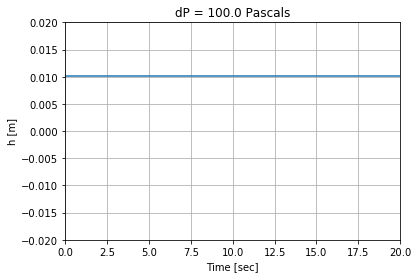

In [2]:
def model1(deltaP = 100.0):
    h = deltaP/(rho*g)
    plt.axis(axis)
    plt.plot(plt.xlim(),[h,h])
    plt.grid()
    plt.xlabel('Time [sec]')
    plt.ylabel('h [m]')
    plt.title('dP = {0:5.1f} Pascals'.format(deltaP))

interact(model1,deltaP=(-200,200,20.0));

## 3.8.5 Model 2. Dynamic Response with Negligible Viscosity

The second model for the manometer includes the dynamics associated with moving a mass $m$ of the liquid column held within the manometer. For this model we will chose a different measure of displacem


The net force on the liquid column is due to the applied pressure differential, $A\Delta P$, and the gravitational force due to the difference in liquid levels between the two arms of the manometer, $2 A \rho g$. $A$ is the cross-sectional area. From Newton's law

$$m \frac{d^2y}{dt^2} = A \Delta P - 2 A \rho g y$$

The mass of liquid is $m = \rho L A$ where $L$ is the total length of the liquid column.  After canceling a common factor $A$, the result is an inhomogeneous linear second order differential equation

$$ \frac{d^2y}{dt^2} + \frac{2 g}{L} y = \frac{1}{\rho L} \Delta P$$

At steady state this model reduces to the static case outlined in model 1 above. The dynamic case corresponds to an undamped harmonic oscillator with an angular frequency

$$\omega = \sqrt{\frac{2 g}{L}}$$

For numerical solution using the scipy libraries, it is necessary to convert the second order differential equation to a system of first order differential equations. 

$$\begin{align*}
\frac{dy}{dt} & = v \\
\frac{dv}{dt} & = -\frac{2g}{L} y + \frac{1}{\rho L} \Delta P 
\end{align*}$$

    natural frequency = 1.7 rad/sec
period of oscillation = 3.8 seconds


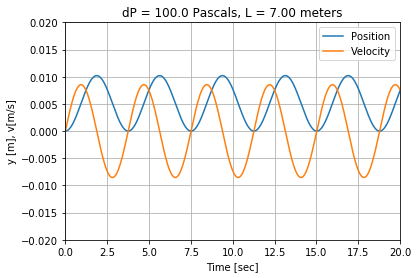

In [3]:
def model2(deltaP=100, L = 7.0):

    def deriv(X,t):
        x,v = X
        xdot = v
        vdot = -(2*g/L)*x + deltaP/rho/L
        return [xdot,vdot]

    IC = [0,0]
    
    w = np.sqrt(2*g/L)
    print("    natural frequency = {0:0.1f} rad/sec".format(w))
    print("period of oscillation = {0:0.1f} seconds".format(2*np.pi/w))
    
    sol = odeint(deriv,IC,t)
    plt.axis(axis)
    plt.plot(t,sol)
    plt.grid()
    plt.xlabel('Time [sec]')
    plt.ylabel('y [m], v[m/s]')
    plt.title('dP = {0:5.1f} Pascals, L = {1:4.2f} meters'.format(deltaP,L))
    plt.legend(['Position','Velocity'])
    
interact(model2, deltaP = (-200,200,1), L = (0.2,10,0.1));

## 3.8.6 Model 3. Dynamic Response with Viscous Dissipation

This third model for manometer incorporates the energy loss due to viscous dissipation in fluid motion. The pressure drop due to the laminar flow of incompressible Newtonian fluid in a long pipe with circular cross-section is given by the Hagen-Poiseuille equation

$$\Delta P_{drag} = \frac{32 \mu L v}{d^2}$$

where $\mu$ is the dynamic viscosity and $d$ is pipe diameter. Doing a balance of forces acting on the fluid column

$$\rho AL\frac{d^2y}{dt^2} + \frac{32\mu L A}{d^2}v + 2 A \rho g y = A \Delta P$$

Denoting $\nu = \frac{\mu}{\rho}$ as the kinematic viscosity, substituting for velocity $\frac{dy}{dt} = v$ leaves

$$\frac{d^2y}{dt^2} + \frac{32 \nu }{d^2}\frac{dy}{dt} + \frac{2g}{L} y = \frac{1}{\rho L} \Delta P$$

This can be recast as a pair of first-order linear differential equations

$$\begin{align*}
\frac{dy}{dt} & = v \\
\frac{dv}{dt} & = -\frac{2g}{L} y - \frac{32 \nu }{d^2}v + \frac{1}{\rho L} \Delta P 
\end{align*}$$

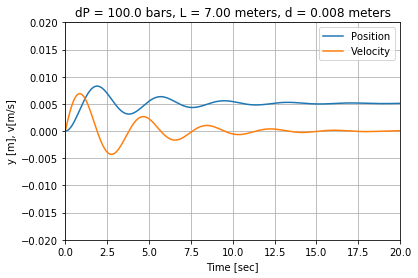

In [4]:
def model3(dP = 100.0, L = 7.0, d = 0.008):

    def deriv(X,t):
        y,v = X
        ydot = v
        vdot = -(2*g/L)*y - (32*nu/d**2)*v + dP/rho/L
        return [ydot,vdot]

    IC = [0,0]
    sol = odeint(deriv,IC,t)
    plt.axis(axis)
    plt.plot(t,sol)
    plt.grid()
    plt.xlabel('Time [sec]')
    plt.ylabel('y [m], v[m/s]')
    plt.title('dP = {0:5.1f} bars, L = {1:4.2f} meters, d = {2:5.3f} meters'.format(dP,L,d))
    plt.legend(['Position','Velocity'])

w  = interactive(model3, dP=(-200,200,20), L = (0.2,30,0.1), d=(0.001,0.020,0.001));
w.children[2].readout_format = '.3f'
w

## 3.8.7 Model 4. Second Order System in Standard Form

Standard form of a damped second order system is

$$\tau^2\frac{d^2y}{dt^2} + 2\zeta\tau\frac{dy}{dt} + y = K u(t)$$

Examples include buildings, car suspensions, other structures. Starting with the model equation 

$$\frac{d^2y}{dt^2} + \frac{32 \nu }{d^2}\frac{dy}{dt} + \frac{2g}{L} y = \frac{1}{\rho L} \Delta P$$

The first step is to normalize the zeroth order term in $y$ and compare to the second-order model in standard form

$$\underbrace{\frac{L}{2g}}_{\tau^2}\frac{d^2y}{dt^2} + \underbrace{\frac{16 \nu L}{g d^2}}_{2\zeta\tau}\frac{dy}{dt} + y = \underbrace{\frac{1}{2\rho g}}_K \underbrace{\Delta P}_{u(t)}$$

Solving for the coefficients in standard form

$$\begin{align*}
K & = \frac{1}{2\rho g}\\
\tau & = \sqrt{\frac{L}{2g}} \\
\zeta & = \frac{8\nu}{d^2}\sqrt{\frac{2L}{g}}
\end{align*}$$

#### 3.8.7.1 Undamped ($\zeta = 0$)

#### 3.8.7.2 Underdamped ($\zeta < 1$)

#### 3.8.7.3 Critically damped ($\zeta = 1$)

$$d_\text{critical damping} = \left(\frac{128 \nu^2 L}{g}\right)^\frac{1}{4}$$

#### 3.8.7.4 Overdamped ($\zeta > 1$)

In [5]:
K = 1/2/rho/g
tau = np.sqrt(L/2/g)
zeta = (8*nu/d**2)*np.sqrt(2*L/g)
print(K,tau,zeta)


dcritical = (128*nu*nu*L/g)**0.25
print(dcritical)

5.10204081632653e-05 0.597614304667 0.00149403576167
0.0030922207027757817


## 3.8.8 Model 5. Dynamic Response to Sinusoidal Input

$$\frac{d^2y}{dt^2} + \frac{32 \nu }{d^2}\frac{dy}{dt} + \frac{2g}{L} y = \frac{1}{\rho L} \Delta P$$

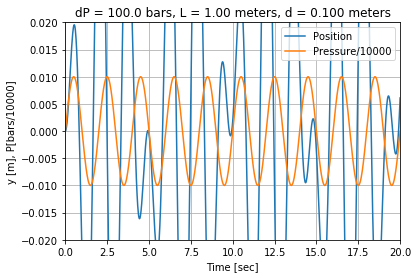

In [6]:
def model4(dP=100.0, L=1.0, d=0.10, freq=0.5):

    def deriv(X,t):
        x,v = X
        xdot = v
        vdot = -(2*g/L)*x - (32*nu/d**2)*v + dP*np.sin(2.0*np.pi*freq*t)/rho/L
        return [xdot,vdot]

    IC = [0,0]
    sol = odeint(deriv,IC,t)
    plt.axis(axis)
    plt.plot(t,sol[:,1])
    plt.plot(t,dP*np.sin(2.0*np.pi*freq*t)/10000)
    plt.grid()
    plt.xlabel('Time [sec]')
    plt.ylabel('y [m], P[bars/10000]')
    plt.title('dP = {0:5.1f} bars, L = {1:4.2f} meters, d = {2:5.3f} meters'.format(dP,L,d))
    plt.legend(['Position','Pressure/10000'])

interact(model4, dP=(-200,200,20), L = (0.2,5,0.1), d=(0.01,0.20,0.002), freq=(0,4,0.01));

## 3.8.9 Model 6. State Space Representation

State space models are widely used in textbooks, software, and the research literature to represent linear systems. It's a generic model that represents a system with inputs and outputs. Here's how to recast out manometer model is time-varying pressure as a state model where the liquid level is the measured output.

Start with the model written as a differential equation

$$\frac{d^2y}{dt^2} + \frac{32\nu}{d^2}\frac{dy}{dt} + \frac{2g}{L} y = \frac{1}{\rho L} \Delta P$$

Assemble the dependent variables in a vector, and rewrite using matrix/vector operations.

$$\begin{align*}
\frac{d}{dt}
\left[\begin{array}{c}y \\ v\end{array}\right]
& =
\left[\begin{array}{cc}0 & 1 \\ - \frac{2g}{L} & -\frac{32\nu}{d^2} \end{array}\right]
\left[\begin{array}{c}y \\ v\end{array}\right]
+
\left[\begin{array}{c}0 \\ \frac{1}{\rho L}\end{array}\right]
\left[\Delta P\right] \\
\left[y\right]
& =
\left[\begin{array}{c} 1 & 0\end{array}\right]
\left[\begin{array}{c}y \\ v\end{array}\right]
+
\left[0\right]
\left[\Delta P\right]
\end{align*}
$$

Use standard symbols to label the vectors and matrices.

$$\begin{align*}
\frac{d}{dt}
\underbrace{\left[\begin{array}{c}y \\ v\end{array}\right]}_{x}
& =
\underbrace{\left[\begin{array}{cc}0 & 1 \\ - \frac{2g}{L} & -\frac{32\nu}{d^2} \end{array}\right]}_{A}
\underbrace{\left[\begin{array}{c}y \\ v\end{array}\right]}_{x}
+
\underbrace{\left[\begin{array}{c}0 \\ \frac{1}{\rho L}\end{array}\right]}_{B}
\underbrace{\left[\Delta P\right]}_{u} \\
\underbrace{\left[y\right]}_{y} 
& =
\underbrace{\left[\begin{array}{c} 1 & 0\end{array}\right]}_{C}
\underbrace{\left[\begin{array}{c}y \\ v\end{array}\right]}_{x}
+
\underbrace{\left[0\right]}_{D}
\underbrace{\left[\Delta P\right]}_{u}
\end{align*}
$$

The result is a model of a linear system in a standard state space representation. 

$$\begin{align*}
\frac{dx}{dt} & = Ax + Bu \\
y & = Cx + Du
\end{align*}$$



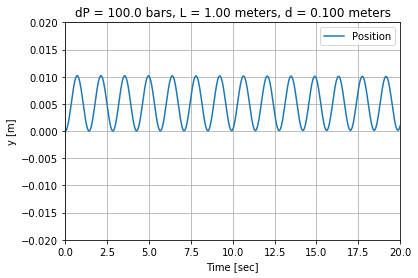

In [7]:
def model6(dP=100, L=1.0, d=0.10):

    A = [[0,1],[-2*g/L, -32*nu/(d**2)]]
    B = [[0],[1/rho/L]]
    C = [[1,0]]
    D = [[0]]
    
    sys = ss(A,B,C,D)
    y,tout = step(sys,t);

    plt.axis(axis)
    plt.plot(t,dP*y)
    plt.grid()
    plt.xlabel('Time [sec]')
    plt.ylabel('y [m]')
    plt.title('dP = {0:5.1f} bars, L = {1:4.2f} meters, d = {2:5.3f} meters'.format(dP,L,d))
    plt.legend(['Position'])
    
interact(model6, dP=(-200,200,1), L = (0.2,5,0.1), d=(0.01,0.20,0.002));

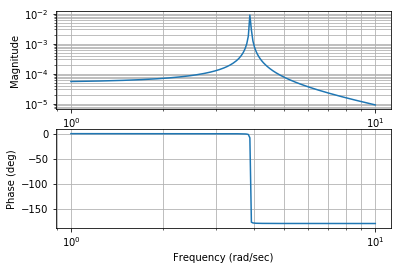

In [11]:
w = np.logspace(0,1,200)

def model6(L=1.0, d=0.10):

    A = [[0,1],[-2*g/L, -32*nu/(d**2)]]
    B = [[0],[1/rho/L]]
    C = [[1,0]]
    D = [[0]]

    mano = ss(A,B,C,D)
    bode(mano,w);
    
interact(model6, L = (0.2,5,0.1), d=(0.01,0.20,0.002));

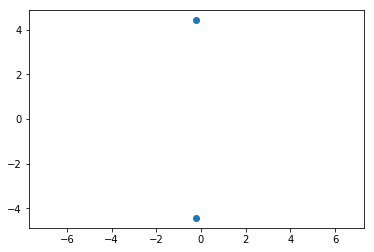

In [9]:
w = np.logspace(0,1,200)

def model6(L=1.0, d=0.10):

    A = [[0,1],[-2*g/L, -128*nu/(np.pi*d**4)]]
    B = [[0],[1/rho/L]]
    C = [[1,0]]
    D = [[0]]

    e_vals,e_vecs = la.eig(A)
    
    plt.axis([-5,5,-5,5])
    plt.axis('equal')
    plt.plot(e_vals.real,e_vals.imag,'o')
    
    
    
interact(model6, L = (0.2,5,0.1), d=(0.01,0.20,0.002));

<!--NAVIGATION-->
< [3.7 Interacting Tanks](https://jckantor.github.io/cbe30338-2021/03.07-Interacting-Tanks.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [3.9 Modeling and Control of a Campus Outbreak of Coronavirus COVID-19](https://jckantor.github.io/cbe30338-2021/03.09-COVID-19.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe30338-2021/blob/master/docs/03.08-Manometer-Models-and-Dynamics.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe30338-2021/03.08-Manometer-Models-and-Dynamics.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>